In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Twitter_Data.csv')
df1

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [3]:
df2 = pd.read_csv('apps.csv')
df2

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df3 = pd.read_csv('user_reviews.csv')
df3

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [15]:
data = pd.concat([df1, df2, df3], ignore_index=True)

In [16]:
data.head()

,clean_text,category,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,when modi promised “minimum government maximum...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,talk all the nonsense and continue all the dra...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,what did just say vote for modi welcome bjp t...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,asking his supporters prefix chowkidar their n...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,answer who among these the most powerful world...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [33]:
def preprocess_text(text):
    text = text.lower()  
    text = nltk.word_tokenize(text) 
    text = [word for word in text if word.isalnum()] 
    text = [word for word in text if word not in stopwords.words('english')] 
    return ' '.join(text)

In [34]:
data.columns

Index(['clean_text', 'category', 'Unnamed: 0', 'App', 'Category', 'Rating',
       'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'Current Ver', 'Android Ver',
       'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [43]:
pip install pandas numpy nltk scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [45]:
data

,text,sentiment,cleaned_text
0,I love this product!,1,love product
1,This is the worst service I have ever experien...,0,worst service ever experienced
2,I am feeling great today.,1,feeling great today
3,I am not happy with my purchase.,0,happy purchase
4,"This is okay, neither good nor bad.",2,okay neither good bad


In [46]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text
    text = [word for word in text if word.isalnum()]  # Remove punctuation
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)


In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])  # Feature matrix

# Labels for sentiment
y = data['sentiment']  # Ensure your labels are numeric (e.g., 0 for negative, 1 for positive, 2 for neutral)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_pred = model.predict(X_test)

In [52]:
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_pred))

Unique classes in y_test: [0]
Unique classes in y_pred: [1]


In [57]:
target_names = ['Negative', 'Positive', 'Neutral']
class_to_name = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

In [58]:
present_target_names = [class_to_name[i] for i in unique_classes]

In [59]:
print(classification_report(y_test, y_pred, target_names=present_target_names, labels=unique_classes))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\saumy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saumy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saumy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saumy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

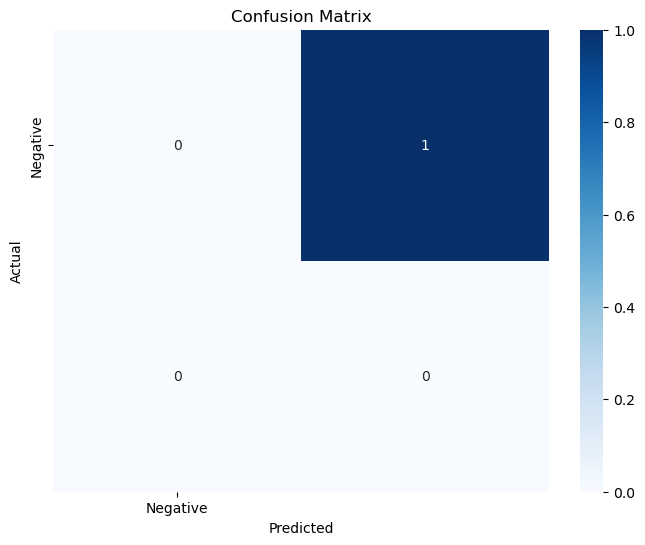

In [60]:
cm = confusion_matrix(y_test, y_pred)
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=present_target_names, yticklabels=present_target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

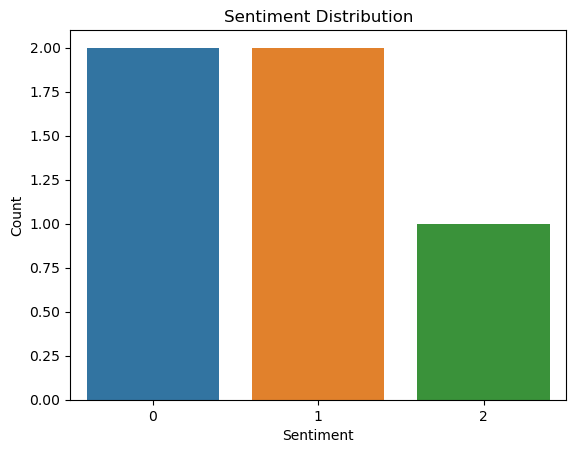

In [71]:
# Example visualization of sentiment distribution
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [74]:
data

,text,sentiment,cleaned_text
0,I love this product!,1,love product
1,This is the worst service I have ever experien...,0,worst service ever experienced
2,I am feeling great today.,1,feeling great today
3,I am not happy with my purchase.,0,happy purchase
4,"This is okay, neither good nor bad.",2,okay neither good bad


In [76]:
sentiment_counts = data['sentiment'].value_counts().sort_index()

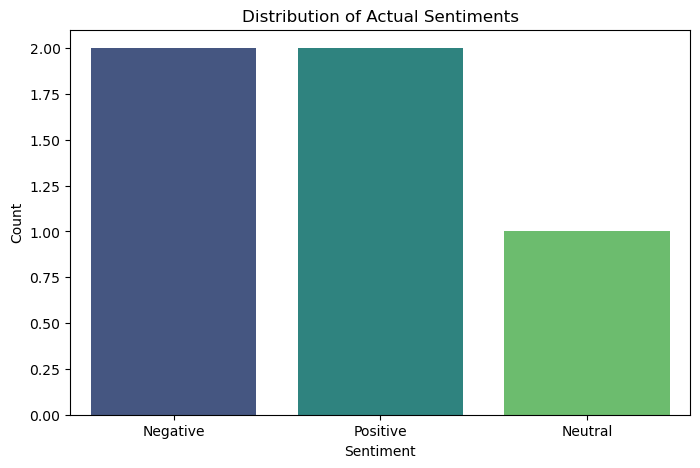

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.title('Distribution of Actual Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [81]:
#Thank you